# Ashwin Ramesh

## Research question/interests

I would like to research the effects of stock splits on the top tech stocks between 2010 and 2016. Namely Apple, Microsoft, Facebook and Google stock. I would like to analyze how the trading volume was affected by the split and if there was a directional bias associated with the stock split (If it was a positive or negative bias).

In [2]:
import pandas as pd
import numpy as np
import plotly as go
import matplotlib.pylab as plt
import seaborn as sns 

fundamentals_Df = pd.read_csv('../data/raw/fundamentals.csv')
pricesplit_Df = pd.read_csv('../data/raw/prices-split-adjusted.csv')
prices_Df = pd.read_csv('../data/raw/prices.csv')
securities_Df = pd.read_csv('../data/raw/securities.csv')




In [3]:
pricesplit_Df.shape

(851264, 7)

In [4]:
pricesplit_Df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


I noticed that the data is not ordered by date. This would make analysis difficult and hence it must be corrected as shown below. 

In [5]:
sorted_pricesplit=pricesplit_Df.sort_values(by = ["date"], ascending = True)
sorted_pricesplit.to_csv('sorted_pricesplit.csv', index =False)

In [6]:
sorted_pricesplit.nunique(axis=0)

date        1762
symbol       501
open       97522
close      98520
low        97470
high       97784
volume    171073
dtype: int64

In [7]:
sorted_pricesplit.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,851264.000000
mean,64.993618,65.011913,64.336541,65.639748,5415112.640027
std,75.203893,75.201216,74.459518,75.906861,12494681.433081
min,1.660000,1.590000,1.500000,1.810000,0.000000
25%,31.270000,31.292776,30.940001,31.620001,1221500.000000
50%,48.459999,48.480000,47.970001,48.959999,2476250.000000
75%,75.120003,75.139999,74.400002,75.849998,5222500.000000
max,1584.439941,1578.130005,1549.939941,1600.930054,859643400.000000


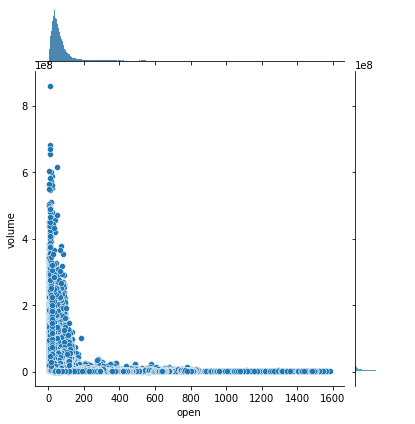

In [8]:
sns.jointplot(x='open',y='volume', data=sorted_pricesplit)


It is noticable through the above joint plot that for a 6 year interval between 2010 and 2016, there is a lot of trading volume for stocks that are in the lower price range as opposed to the higher price range. This refects the general behavior of retail investors as cheaper stocks are easier to invest into with minimal risk. As the prices increase, trading volume decreases significantly even over a long period of time. 

              date symbol        open       close         low        high  \
254     2010-01-04   AAPL   30.490000   30.572857   30.340000   30.642857   
721     2010-01-05   AAPL   30.657143   30.625713   30.464285   30.798571   
1189    2010-01-06   AAPL   30.625713   30.138571   30.107143   30.747143   
1657    2010-01-07   AAPL   30.250000   30.082857   29.864286   30.285715   
2125    2010-01-08   AAPL   30.042856   30.282858   29.865715   30.285715   
...            ...    ...         ...         ...         ...         ...   
848767  2016-12-23   AAPL  115.589996  116.519997  115.589996  116.519997   
849267  2016-12-27   AAPL  116.519997  117.260002  116.489998  117.800003   
849767  2016-12-28   AAPL  117.519997  116.760002  116.199997  118.019997   
850267  2016-12-29   AAPL  116.449997  116.730003  116.400002  117.110001   
850767  2016-12-30   AAPL  116.650002  115.820000  115.430000  117.199997   

             volume  
254     123432400.0  
721     150476200.0  
1189    1

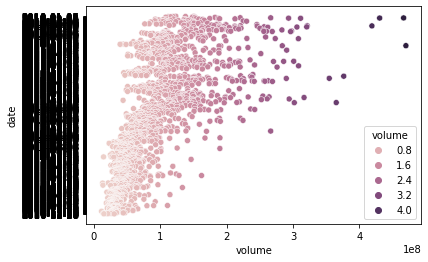

In [28]:
#interested_stocks= ["AAPL", "MSFT", "FB", "GOOGL"]
apple_stock=sorted_pricesplit.loc[sorted_pricesplit["symbol"]=="AAPL"]
print(apple_stock)
#analysis_list

gfg=sns.scatterplot(x = "date", y = "volume", data = apple_stock, hue = "volume")
plt.show()
#gfg.set_xticklabels(gfg.get_xticklabels(), rotate=90)
